

# Project: Investigate a Dataset (TMDb_Movies Dataset)

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
<li><a href="#Limitations">Limitations</a></li>
<li><a href="#Question 1">Question 1</a></li>
<li><a href="#Question 2">Question 2</a></li>
<li><a href="#Question 3">Question 3</a></li>
<li><a href="#Question 4">Question 4</a></li>
<li><a href="#Question 5">Question 5</a></li>
</ul>

<a id='intro'></a>
## Introduction

> **Tip**: in this project I work on  TMDb movies dataset.

This data set contains information about 10865 movies collected from The Movie Database (TMDb). It consist of 21 columns such as imdb_id, revenue, budget, vote_count etc.

## Question that can answered from this data set:

1-which Movies has biggest and smallest profit?

2-which Movies with biggest and smallest budgets?

3-which years has biggest and smallest number of producing Movies?

4- relation between profits and years and which year had maximum and minimum profits ? 

5-Average (budgets,runtime) of the movies 

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

<a id='wrangling'></a>
## Data Wrangling

> **Tip**: After i take a look on the dataset and set the questions for the analysis i delete  unsued(unuseful) data so that i can make my calculation 
at first i load my data and see details about it like the shape to know number of rows and columns at the next step i use info function to see more details about my data and see if there is a nulling values to treat with it then i use duplicate function to see if there is any duplicated rows and delete it then i use is null function to see if there is nulling values and delete it at last step i use dtypes function to see the data type of each column.

### General Properties

In [3]:
# Load your data and print out a few lines. Perform operations to inspect data
df=pd.read_csv('tmdb-movies.csv')
#   types and look for instances of missing or possibly errant data.
df.head(1)

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09


In [4]:
# know number of rows and columns 
df.shape

(10866, 21)

In [5]:
#see more details about my data and see if there is a nulling values 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
id                      10866 non-null int64
imdb_id                 10856 non-null object
popularity              10866 non-null float64
budget                  10866 non-null int64
revenue                 10866 non-null int64
original_title          10866 non-null object
cast                    10790 non-null object
homepage                2936 non-null object
director                10822 non-null object
tagline                 8042 non-null object
keywords                9373 non-null object
overview                10862 non-null object
runtime                 10866 non-null int64
genres                  10843 non-null object
production_companies    9836 non-null object
release_date            10866 non-null object
vote_count              10866 non-null int64
vote_average            10866 non-null float64
release_year            10866 non-null int64
budget_adj              1

In [6]:
#see if there is any duplicated rows and delete it 
df.duplicated().sum()

1

In [7]:
#calculate number of nulling values on each column
df.isnull().sum()

id                         0
imdb_id                   10
popularity                 0
budget                     0
revenue                    0
original_title             0
cast                      76
homepage                7930
director                  44
tagline                 2824
keywords                1493
overview                   4
runtime                    0
genres                    23
production_companies    1030
release_date               0
vote_count                 0
vote_average               0
release_year               0
budget_adj                 0
revenue_adj                0
dtype: int64

In [8]:
#see the data type of each column.
df.dtypes

id                        int64
imdb_id                  object
popularity              float64
budget                    int64
revenue                   int64
original_title           object
cast                     object
homepage                 object
director                 object
tagline                  object
keywords                 object
overview                 object
runtime                   int64
genres                   object
production_companies     object
release_date             object
vote_count                int64
vote_average            float64
release_year              int64
budget_adj              float64
revenue_adj             float64
dtype: object


### Data Cleaning (Removing the unused,duplicated,null values data from the dataset )
1-remove unused column such as id, imdb_id, vote_count, production_company, keywords, homepage etc

2-Removing the duplicacy in the rows

3-Remove NULL values

4-Replac zero with NAN in  'budget', 'revenue' column and delete it

5-Chang format of budget and revenue column

In [9]:
#1
# After discussing the structure of the data and any problems that need to be
#   cleaned, perform those cleaning steps in the second part of this section.
del_col=[ 'id', 'imdb_id', 'popularity', 'budget_adj', 'revenue_adj', 'homepage', 'keywords', 'overview', 'production_companies', 'vote_count', 'vote_average']
df.drop(del_col,axis=1, inplace=True)


In [10]:
df.head(1)

,budget,revenue,original_title,cast,director,tagline,runtime,genres,release_date,release_year
0,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,The park is open.,124,Action|Adventure|Science Fiction|Thriller,6/9/15,2015


In [11]:
#see numbers of null values after deleting unused columns
df.isnull().sum()

budget               0
revenue              0
original_title       0
cast                76
director            44
tagline           2824
runtime              0
genres              23
release_date         0
release_year         0
dtype: int64

In [12]:
# see the data type of each column after deleting unused columns
df.dtypes

budget             int64
revenue            int64
original_title    object
cast              object
director          object
tagline           object
runtime            int64
genres            object
release_date      object
release_year       int64
dtype: object

In [13]:
#see if there is any duplicated rows and delete it after deleting unused columns
df.duplicated().sum()

1

In [14]:
#Removing the duplicacy in the rows
df.drop_duplicates(inplace=True)

In [15]:
# checking if all duplicates values deleted To avoid any errors
df.duplicated().sum()

0

In [16]:
#Replac zero with NAN in 'budget', 'revenue' column 
columns=['budget', 'revenue']

df[columns] =df[columns].replace(0,np.NAN)


In [17]:
# delete Nullvalues on 'budget', 'revenue' column  
df.dropna( subset =columns, inplace = True)

In [18]:
# taking alook on number of rows and columns
df.shape

(3854, 10)

In [19]:
# taking alook on data types of The remaining columns
df.dtypes

budget            float64
revenue           float64
original_title     object
cast               object
director           object
tagline            object
runtime             int64
genres             object
release_date       object
release_year        int64
dtype: object

In [20]:
#Chang format of  revenue column
df['revenue']=df['revenue'].astype(int)

In [21]:
#Chang format of budget column
df['budget']=df['budget'].astype(int)

<a id='eda'></a>
## Exploratory Data Analysis

<a id='Question 1'></a>
### Research Question 1 (Calculating which Movies has biggest and smallest profit)

In [22]:
# to calculate profit i subtract the value of budget from revenue then put the value on new column called net_profit
df['net_profit']=df['revenue']-df['budget']

In [23]:
df.head(5)

,budget,revenue,original_title,cast,director,tagline,runtime,genres,release_date,release_year,net_profit
0,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,The park is open.,124,Action|Adventure|Science Fiction|Thriller,6/9/15,2015,1363528810
1,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,What a Lovely Day.,120,Action|Adventure|Science Fiction|Thriller,5/13/15,2015,228436354
2,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,Robert Schwentke,One Choice Can Destroy You,119,Adventure|Science Fiction|Thriller,3/18/15,2015,185238201
3,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,J.J. Abrams,Every generation has a story.,136,Action|Adventure|Science Fiction|Fantasy,12/15/15,2015,1868178225
4,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,James Wan,Vengeance Hits Home,137,Action|Crime|Thriller,4/1/15,2015,1316249360


In [24]:
#returns index of maximum then use the index to give me details about the move that have biggest profit
max=df['net_profit'].idxmax()
print('the index of maximum value is: ',max);
max_info=df.loc[max]
print(max_info)

the index of maximum value is:  1386
budget                                                    237000000
revenue                                                 -2147483648
original_title                                               Avatar
cast              Sam Worthington|Zoe Saldana|Sigourney Weaver|S...
director                                              James Cameron
tagline                                 Enter the World of Pandora.
runtime                                                         162
genres                     Action|Adventure|Fantasy|Science Fiction
release_date                                               12/10/09
release_year                                                   2009
net_profit                                               1910483648
Name: 1386, dtype: object


In [25]:
#returns index of minimum then use the index to give me details about the move that have smallest profit
min=df['net_profit'].idxmin()
print('the index of minimum value is: ',min);
min_info=df.loc[min]
print(min_info)

the index of minimum value is:  2244
budget                                                    425000000
revenue                                                    11087569
original_title                                    The Warrior's Way
cast              Kate Bosworth|Jang Dong-gun|Geoffrey Rush|Dann...
director                                                 Sngmoo Lee
tagline                                     Assassin. Hero. Legend.
runtime                                                         100
genres                    Adventure|Fantasy|Action|Western|Thriller
release_date                                                12/2/10
release_year                                                   2010
net_profit                                               -413912431
Name: 2244, dtype: object


<a id='Question 2'></a>
### Research Question 2  (Calculating which Movies with biggest and smallest budgets?)

In [26]:
#returns index of maximum then use the index to give me details about the move that have biggest budget
highest_cost=df['budget'].idxmax()
print('the index of maximum value is: ',highest_cost);
highest_cost_info=df.loc[highest_cost]
print(highest_cost_info)

the index of maximum value is:  2244
budget                                                    425000000
revenue                                                    11087569
original_title                                    The Warrior's Way
cast              Kate Bosworth|Jang Dong-gun|Geoffrey Rush|Dann...
director                                                 Sngmoo Lee
tagline                                     Assassin. Hero. Legend.
runtime                                                         100
genres                    Adventure|Fantasy|Action|Western|Thriller
release_date                                                12/2/10
release_year                                                   2010
net_profit                                               -413912431
Name: 2244, dtype: object


In [27]:
#returns index of minimum then use the index to give me details about the move that have smallest budget
lowest_cost=df['budget'].idxmin()
print('the index of maximum value is: ',lowest_cost);
lowest_cost_info=df.loc[lowest_cost]
print(lowest_cost_info)

the index of maximum value is:  2618
budget                                                            1
revenue                                                         100
original_title                                         Lost & Found
cast              David Spade|Sophie Marceau|Ever Carradine|Step...
director                                               Jeff Pollack
tagline           A comedy about a guy who would do anything to ...
runtime                                                          95
genres                                               Comedy|Romance
release_date                                                4/23/99
release_year                                                   1999
net_profit                                                       99
Name: 2618, dtype: object


<a id='Question 3'></a>
## Research Question 3 (Calculating which years has biggest and smallest number of producing Movies?)

In [28]:
# calculating the numder of produced movies during years
count=df['release_year'].value_counts()

print(count);

2011    199
2013    180
2010    178
2009    174
2006    169
2008    167
2014    165
2007    165
2005    163
2015    160
2012    158
2004    147
2002    127
2003    121
2001    121
1999    116
2000    106
1998     92
1997     90
1996     86
1995     81
1993     72
1994     62
1988     57
1990     53
1992     53
1989     51
1991     50
1986     48
1987     46
1984     42
1985     41
1983     31
1981     30
1982     26
1980     23
1977     19
1978     17
1979     16
1976     15
1971     13
1967     13
1974     13
1973     12
1970     11
1961     10
1975      9
1968      9
1972      8
1964      7
1962      7
1963      6
1965      5
1966      5
1960      5
1969      4
Name: release_year, dtype: int64


In [29]:
# years that has  the biggest and the smallest number of producing Movies
count=df['release_year'].value_counts().min()
idxcount=df['release_year'].value_counts().idxmin()
print("smallest number of producing Movies is: {} --> at: {}".format(count,idxcount));
countmax=df['release_year'].value_counts().max()
idxcountmax=df['release_year'].value_counts().idxmax()
print("biggest number of producing Movies is: {} --> at: {}".format(countmax,idxcountmax));

smallest number of producing Movies is: 4 --> at: 1969
biggest number of producing Movies is: 199 --> at: 2011


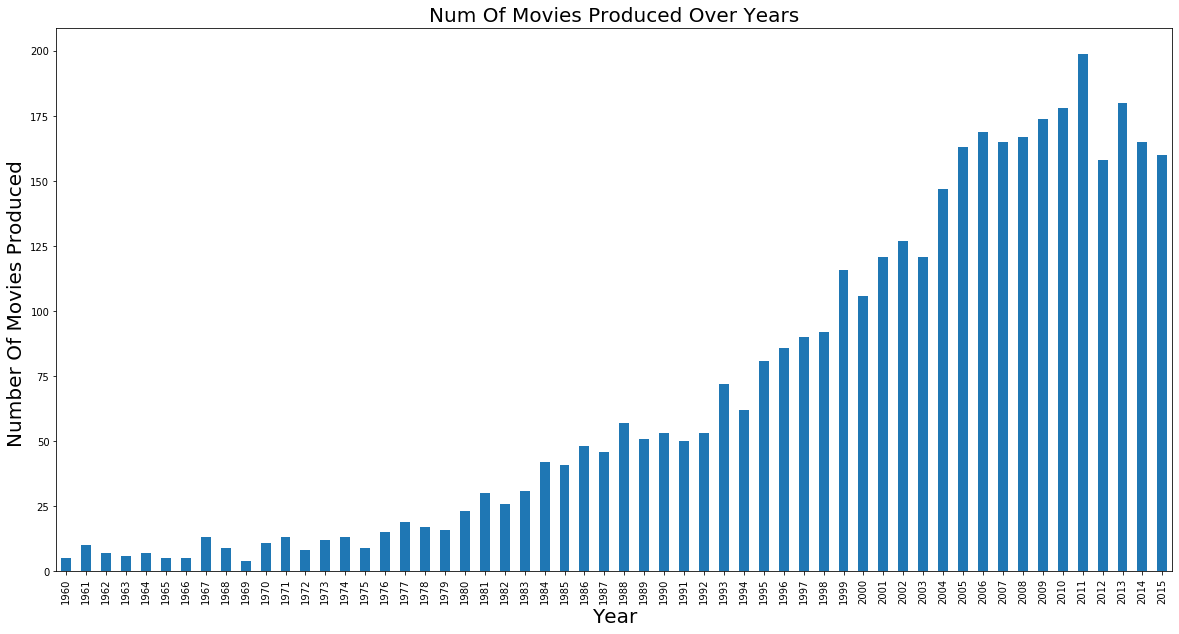

In [30]:
#design plot To summarize what we have done and to illustrate the progress over the years
#Here i Plotting the calculated values using(value_counts())  and sorting them in ascending order by using(sort_index(ascending = True)) with a specification type of plot by usig(kind='bar'),and put value of('release_year')on x-axis and put value of (counted value) on y-axis
count=df['release_year'].value_counts().sort_index(ascending = True).plot(kind='bar', x='release_year', y='num_of_movies',figsize=(20,10));
#title of the x-axis with font size
plt.xlabel("Year",fontsize=20);
#title of the y-axis with font size
plt.ylabel("Number Of Movies Produced ",fontsize=20);
#title of the  plot with font size
plt.title("Num Of Movies Produced Over Years",fontsize=20);

Through this chart, we find that 2011 was the year during which movies were produced the most by 199 movie, and  in 1969 the least year during which films were produced by 4.

<a id='Question 4'></a>
## Research Question 4 (Relation between Profits earned Vs Years and which year had maximum and minimum profits )

In [31]:
profits_year = df.groupby('release_year')['net_profit'].sum()

In [32]:
#calculate maximum profits earned
profits_year.max()

19032145273.0

In [33]:
# Year at which maximum profits earned
profits_year.idxmax()


2015

In [34]:
#calculate minimum profits earned
profits_year.min()

52468689.0

In [35]:
 #Year at which minimum profits earned
profits_year.idxmin()

1966

In [36]:
print(" the maximum profit is: {} that happend at: {}".format(profits_year.max(),profits_year.idxmax()));
print(" the minimum profit is: {} that happend at: {}".format(profits_year.min(),profits_year.idxmin()));

 the maximum profit is: 19032145273.0 that happend at: 2015
 the minimum profit is: 52468689.0 that happend at: 1966


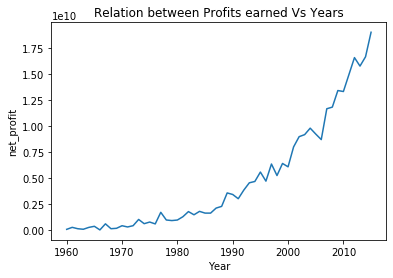

<Figure size 1440x1080 with 0 Axes>

In [37]:
#design plot To summarize what we have done and to illustrate the progress over the years
profits_year = df.groupby('release_year')['net_profit'].sum()
#plotting the graph
plt.plot(profits_year);
#title of the x-axis 
plt.xlabel("Year")
#title of the y-axis 
plt.ylabel("net_profit")
#title of the line plot
plt.title("Relation between Profits earned Vs Years")
#figure size(width, height)
plt.figure(figsize=(20,15));

we can conclude both graphically as well as by calculations that year 2015 was the year where movies made the highest profit ,
and that year 1966 was the year where movies made the smallest profit.

### defining a function to find average of a column(budgets,runtime)
we can say that is:
<a id='Question 5'></a>
### Question 5

In [38]:
# define a function to calculate and return average of a column
def average(column):
    return df[column].mean()

In [39]:
#calling the function to calcualate average of(budget)
average('budget')

37203696.954852104

So the average budget a movie is 37203696.

In [40]:
#calling the function to calcualate average of('runtime')
average('runtime')

109.22029060716139

So the average runtime a movie is 109 minutes. Lets analyse it  by graphic.

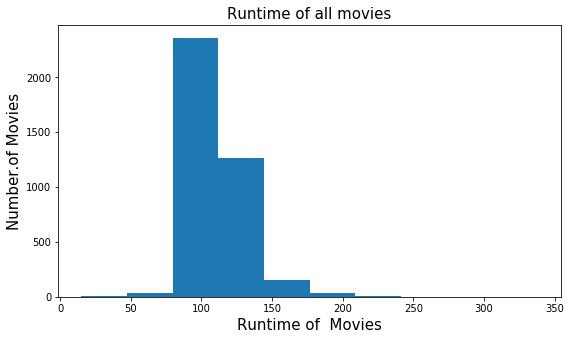

In [42]:
#plotting a histogram of runtime of movies
# figure size(width, height)
plt.figure(figsize=(9,5))
#title of the x-axis  
plt.xlabel('Runtime of  Movies', fontsize = 15)
#title of the y-axis  
plt.ylabel('Number.of Movies', fontsize=15)
#Name of the graph
plt.title('Runtime of all movies', fontsize=15)
#giving a histogram plot
plt.hist(df['runtime'])
#displays the plot
plt.show()

The distribution of the above formed graph is right skewed! Most of the movies are timed between 70 to 145 minutes

<a id='conclusions'></a>
## Conclusions

> **Tip**: Through our operations(Data Wrangling,Data Wrangling), we were able to answer the questions we posed and represent them graphically,I came out with some very interesting facts about movies. After this analysis we can conclude following:
Using this data, we were able to find out which movies have the largest budgets, and thus know the heroes of this work. Through this, we can conclude that if you want the movie to generate revenues, it must include these heroes. We were also able to know the extent of the growth of the movie industry’s revenues over the time period mentioned in the database Knowing the amounts that have been spent on the manufacture of these works, and we also learned about the extent of the expansion and growth of this industry over the years through a planned vision of the number of works that have been produced over the years.
### Question 1
we asked about: which Movies has biggest and smallest profit?
after some operation on data we find that the  movie has biggest profit is Avatar by  1910483648
we find that the  movie has smallest profit is   The Warrior's Way by  -413912431 
### Question 2 
we asked about : which Movies with biggest and smallest budgets?
after some operation on data we find that the  movie has biggest budget is The Warrior's Way  by  425000000
we find that the  movie has smallest budget is  Lost & Found  by  1
### Question 3
we asked about : which years has biggest and smallest number of producing Movies?
after some operation on data we find that the  Year has biggest number of producing Movies is 2011  by  199
we find that Year has smallest number of producing Movies is 1969  by  4
### Question 4 
we asked about : Relation between Profits earned Vs Years and which year had maximum and minimum profits
after some operation on data we find that the Year has biggest Profits earned is 2015 by 19032145273.0
we find that the Year has smallest Profits earned is 1966 by 52468689.0
### Question 5
we asked about :find average of a column(budgets,runtime)
after some operation and defining function for that  find that the average budget a movie is 37203696 and  This reflects the large size of this industry
thre average runtime a movie is 109 minutes



<a id='Limitations'></a>
### Limitations:
This analysis was done considering the movies.  we are not sure if the data provided to us is completel corect and up-to-date. As mentioned before the budget and revenue column do not have currency unit, it might be possible different movies have budget in different currency according to the country they are produce in. So a disparity arises here which can state the complete analysis wrong. Dropping the rows with NAN values also affected the overall analysis
Important note: I worked on this database without knowing whether this data is correct or not